# Heart Disease Prediction using Logistic Regression

This project involves the prediction of the 10-year risk of future coronary heart disease (CHD) in 
patients using logistic regression. The dataset used in this study is publicly available on the Kaggle
website and is from an ongoing cardiovascular study conducted on residents of the town of Framingham, 
Massachusetts. The dataset comprises over 4,238 records with 16 attributes that provide patients' information. 
The main objective of this project is to develop a model that can accurately predict whether a patient has a 
10-year risk of future CHD based on their medical history and other relevant factors. Logistic regression is 
used as the primary machine learning algorithm for this classification task. The project involves exploratory 
data analysis, data cleaning, feature engineering, model training, hyperparameter tuning, and model evaluation.
Finally, the performance of the developed model is assessed using various evaluation metrics, including accuracy,
precision, recall, F1 score, and the confusion matrix.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Task1:Collect Data 

The dataset offered by the module leader is first obtained from the Kaggle website. After that, the dataset is transferred to the Jupiter notebook. It was also incorporated into the project using read_csv, as shown in below:

In [2]:
df = pd.read_csv("framingham.csv")

In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

# Performing EDA

A critical phase of the data analysis process is exploratory data analysis (EDA). It entails identifying, describing, and summarizing a dataset's key features. EDA enables us to comprehend the distribution of the data, spot trends, and spot abnormalities or outliers. We can find missing numbers, mistakes, and inconsistencies that need to be fixed during the data cleaning process by studying the data. EDA also aids in the identification of pertinent features and connections among them, which is crucial for feature engineering and selection. EDA also assists us in selecting the best statistical models and methods for the given dataset. In conclusion, EDA is a crucial step in understanding the data, spotting issues, and getting the data ready for additional analysis. 

# Pie chart for gender

In [6]:
#Renaming the male column to gender_male
df.rename(columns={'male':'gender_male'},inplace=True)

In [7]:
malecount =  df.groupby(["gender_male"])
malecount.first()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender_male,,,,,,,,,,,,,,,
0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0


In [8]:
malecount['gender_male'].count()

gender_male
0    2419
1    1819
Name: gender_male, dtype: int64

Text(0.5, 1.0, 'Gender pie chart')

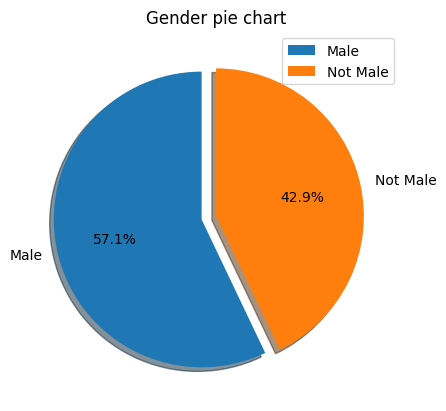

In [9]:
plt.pie(malecount["gender_male"].count(),labels=["Male","Not Male"],startangle=90,shadow=True,explode=(0.1,0),autopct="%1.1f%%")
plt.legend()
plt.title("Gender pie chart")

# Pie chart for current smoker

In [10]:
(df['currentSmoker']==1).value_counts()

False    2144
True     2094
Name: currentSmoker, dtype: int64

In [11]:
currentSmokercount =  df.groupby(["currentSmoker"])
currentSmokercount.first()

,gender_male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
currentSmoker,,,,,,,,,,,,,,,
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [12]:
currentSmokercount['gender_male'].count()

currentSmoker
0    2144
1    2094
Name: gender_male, dtype: int64

Text(0.5, 1.0, 'Smoker pie chart')

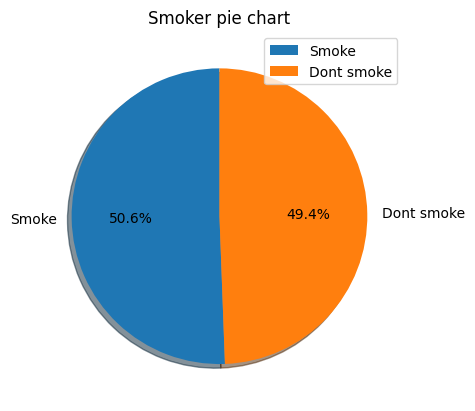

In [13]:
plt.pie(currentSmokercount["gender_male"].count(),labels=["Smoke","Dont smoke"],startangle=90,shadow=True,explode=(0,0),autopct="%1.1f%%")
plt.legend()
plt.title("Smoker pie chart")

# Heart Disease risk patient

In [14]:
risk_patient_count =  df.groupby(["TenYearCHD"])
risk_patient_count.first()

,gender_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0


In [15]:
risk_patient_count['TenYearCHD'].count()

TenYearCHD
0    3594
1     644
Name: TenYearCHD, dtype: int64

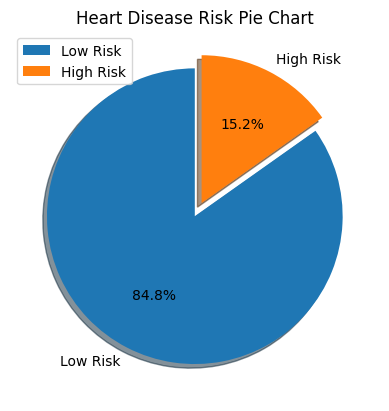

In [16]:
# Pie chart for Heart Disease risk patient
risk_patient_count = df['TenYearCHD'].value_counts()
plt.pie(risk_patient_count, labels=['Low Risk', 'High Risk'], startangle=90, shadow=True, explode=(0, 0.1), autopct="%1.1f%%")
plt.title('Heart Disease Risk Pie Chart')
plt.legend()
plt.show()

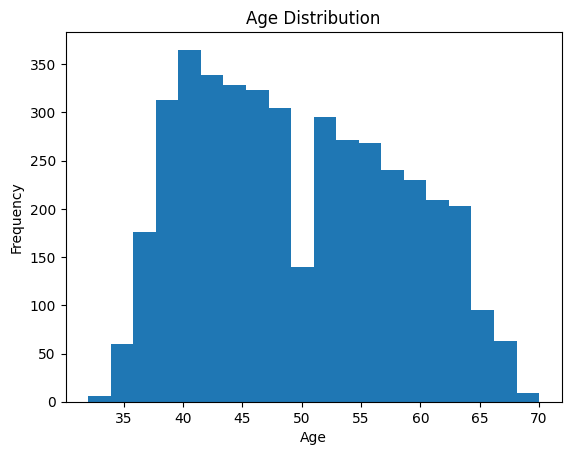

In [17]:
# Histogram for Age
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

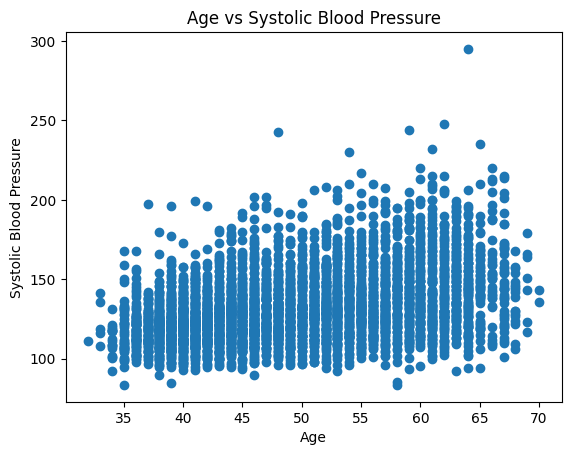

In [18]:
# Scatter plot for age and systolic blood pressure
plt.scatter(df['age'], df['sysBP'])
plt.xlabel('Age')
plt.ylabel('Systolic Blood Pressure')
plt.title('Age vs Systolic Blood Pressure')
plt.show()

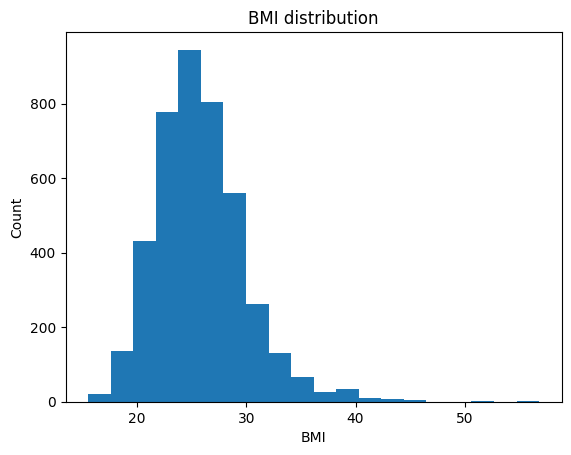

In [19]:
# calculate correlation matrix
corr_matrix = df.corr()


# plot distribution of BMI
plt.hist(df["BMI"], bins=20)
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI distribution")
plt.show()




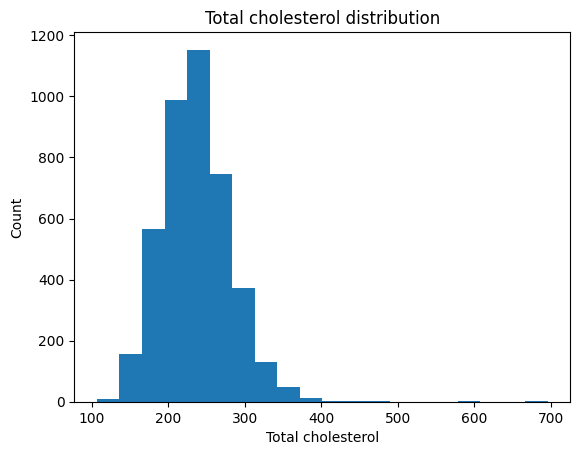

In [20]:
# plot distribution of total cholesterol
plt.hist(df["totChol"], bins=20)
plt.xlabel("Total cholesterol")
plt.ylabel("Count")
plt.title("Total cholesterol distribution")
plt.show()



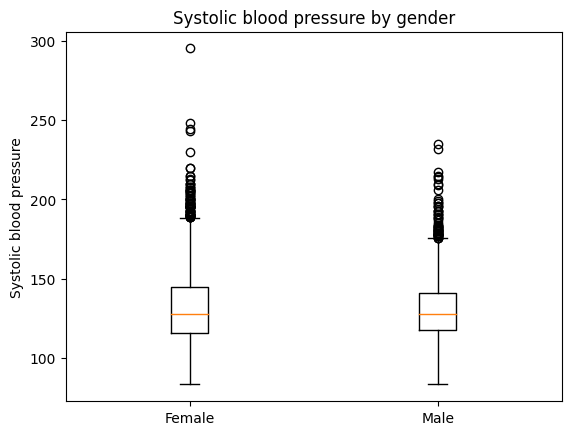

In [21]:

# plot boxplot of systolic blood pressure by gender
plt.boxplot([df[df["gender_male"]==0]["sysBP"], df[df["gender_male"]==1]["sysBP"]])
plt.xticks([1,2], ["Female", "Male"])
plt.ylabel("Systolic blood pressure")
plt.title("Systolic blood pressure by gender")
plt.show()



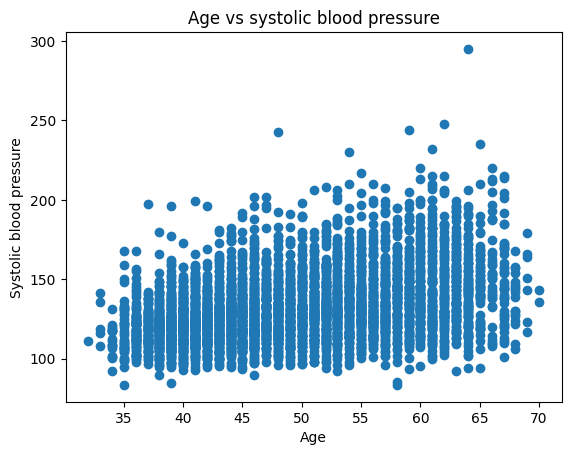

In [22]:
# plot scatter plot of age vs systolic blood pressure
plt.scatter(df["age"], df["sysBP"])
plt.xlabel("Age")
plt.ylabel("Systolic blood pressure")
plt.title("Age vs systolic blood pressure")
plt.show()


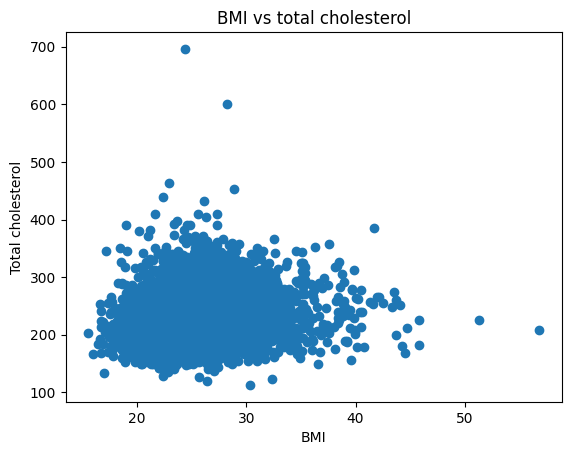

In [23]:


# plot scatter plot of BMI vs total cholesterol
plt.scatter(df["BMI"], df["totChol"])
plt.xlabel("BMI")
plt.ylabel("Total cholesterol")
plt.title("BMI vs total cholesterol")
plt.show()

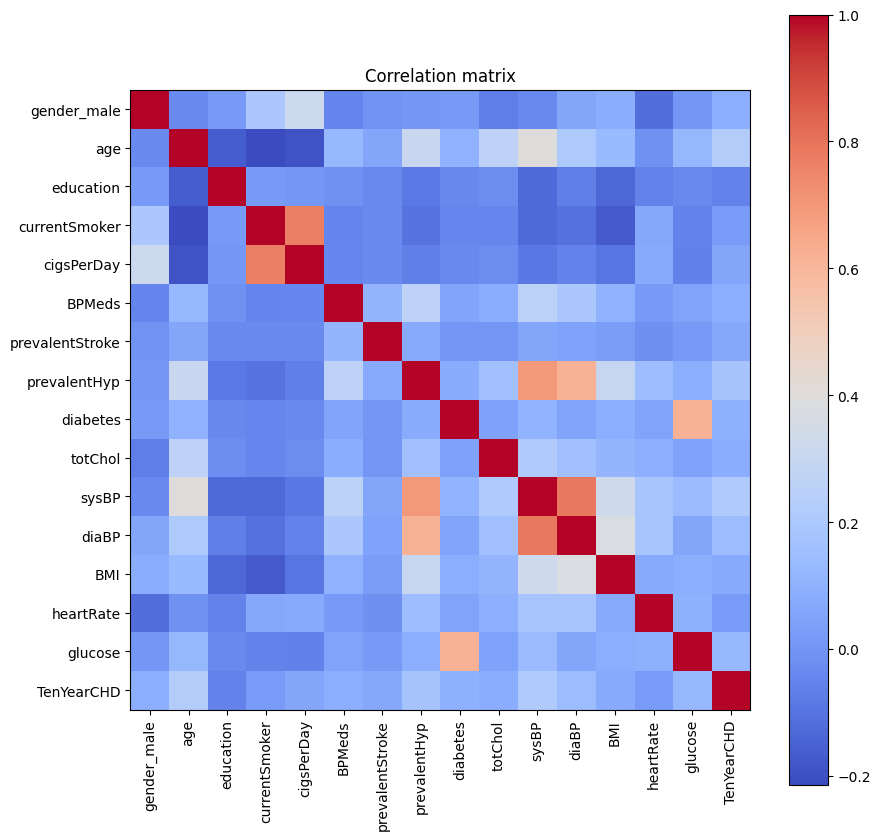

In [24]:
# plot correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
im = ax.imshow(corr_matrix, cmap="coolwarm")
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_yticklabels(corr_matrix.columns)
plt.xticks(rotation=90)
plt.colorbar(im)
plt.title("Correlation matrix")
plt.show()

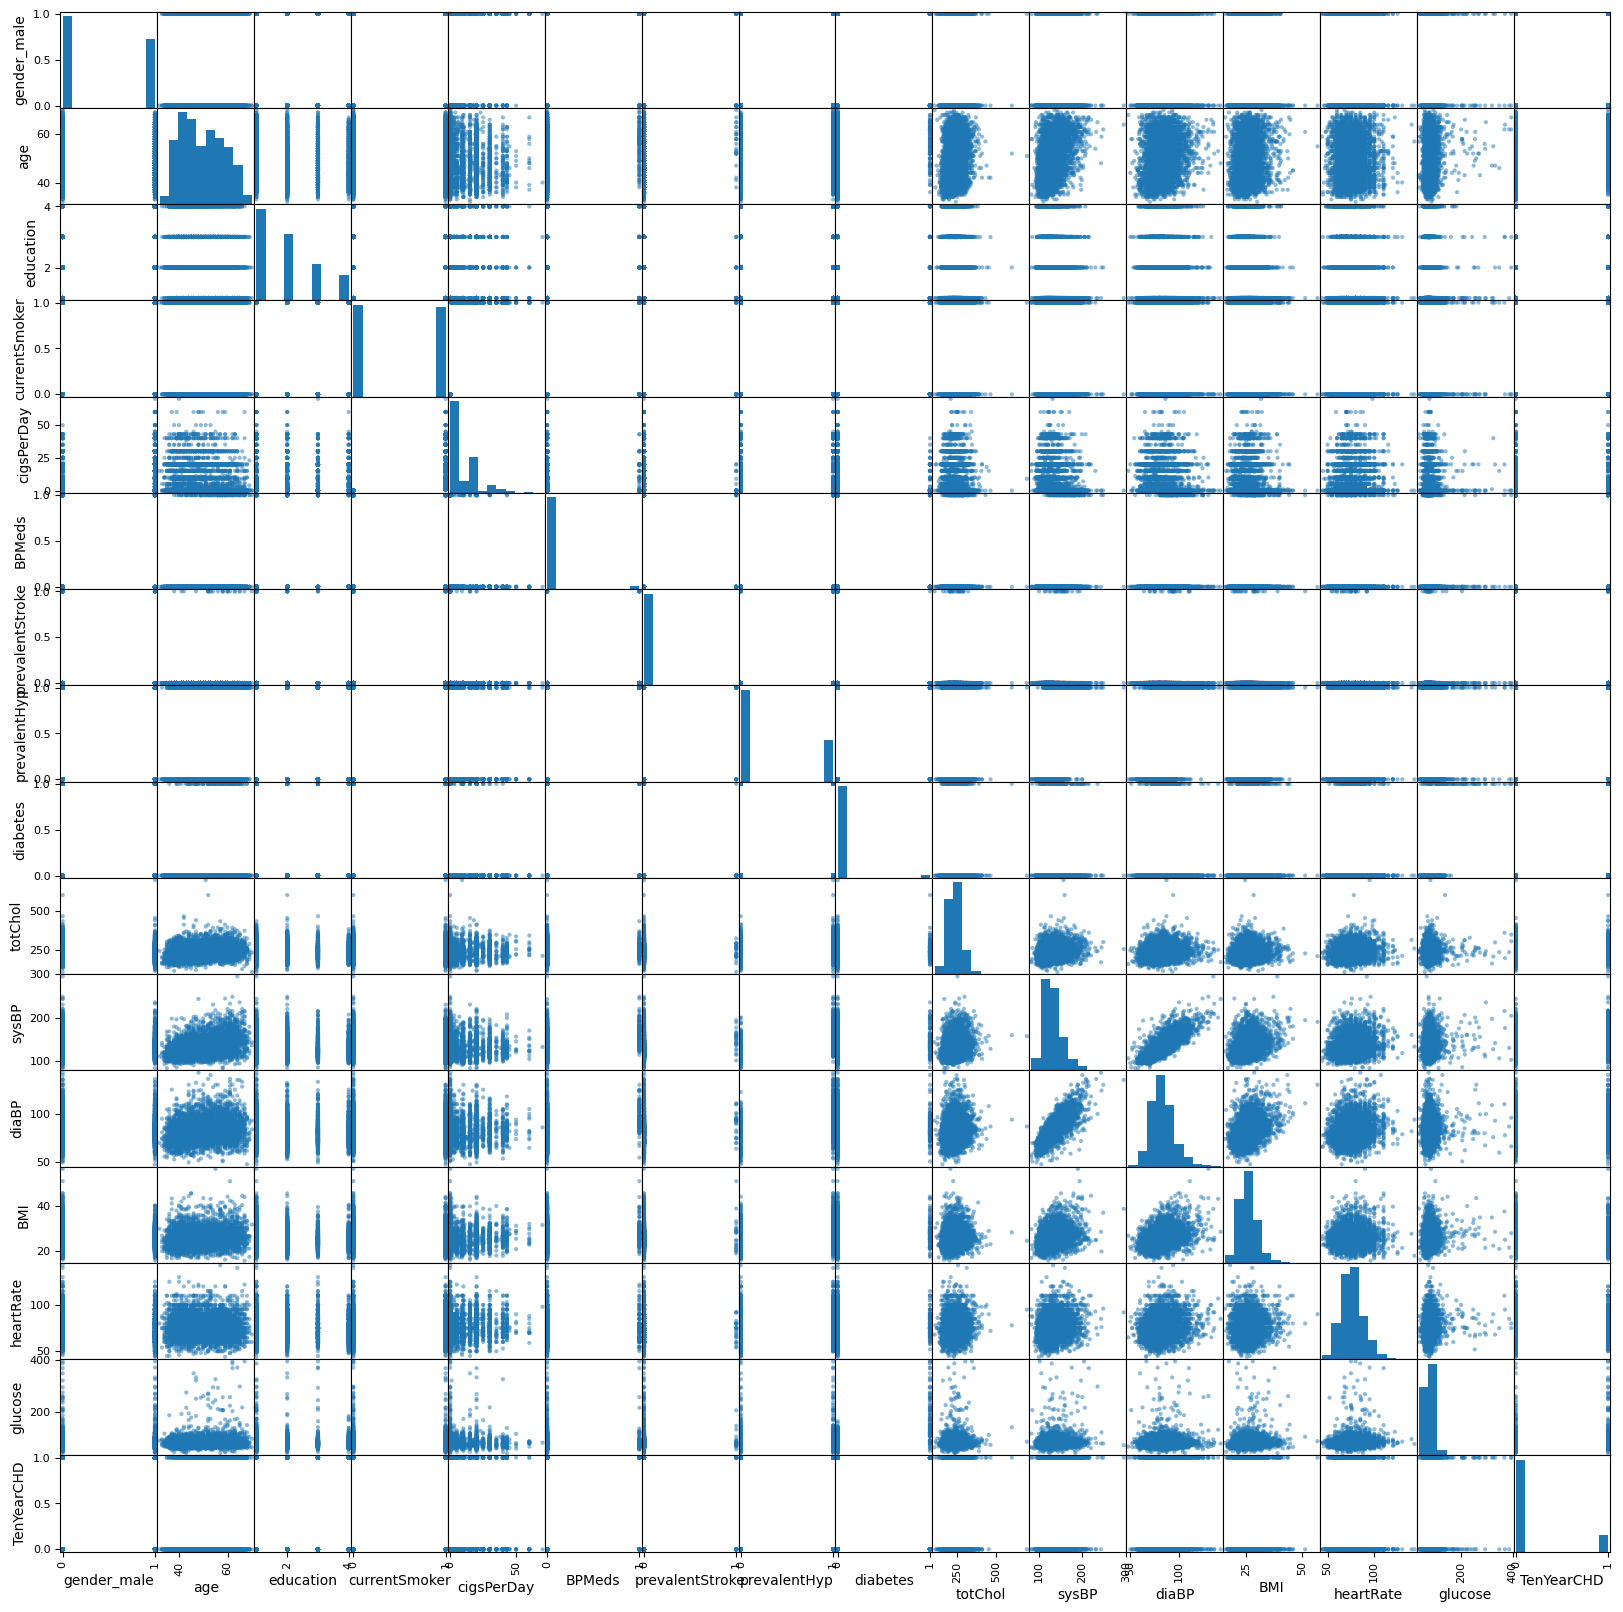

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# create pair plot
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show()

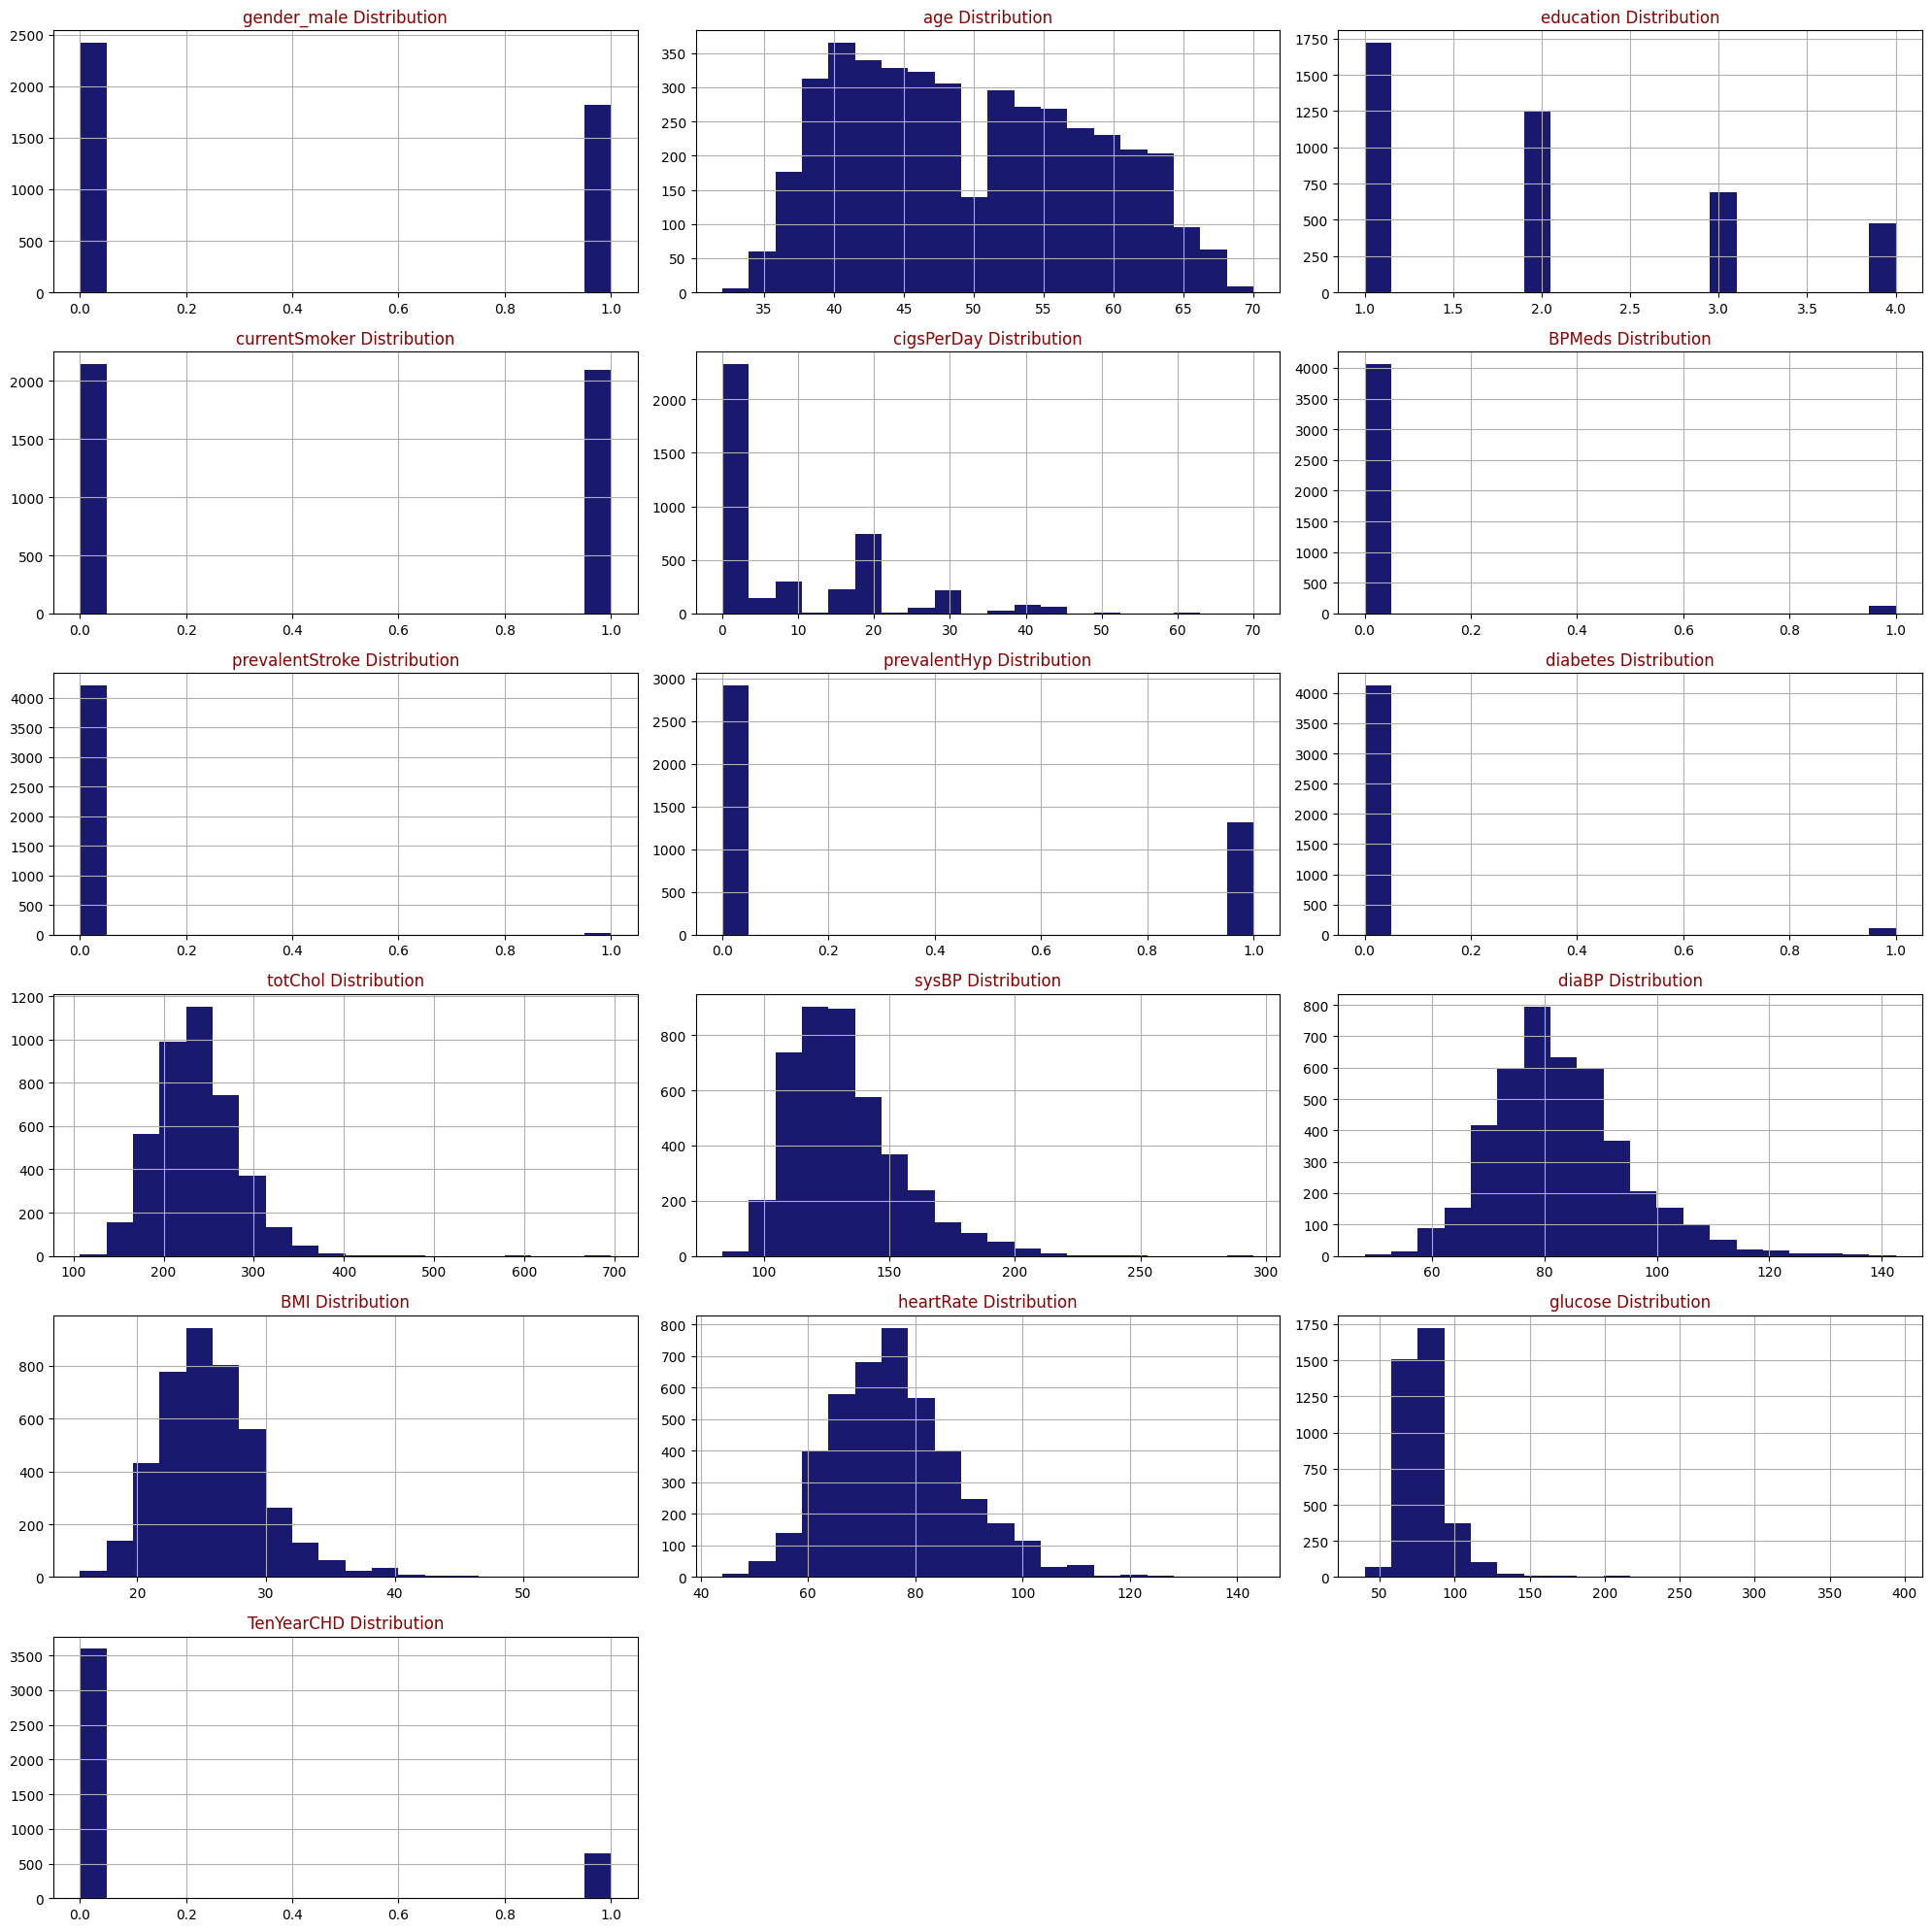

In [26]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [38]:
df.describe()

,gender_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Task3: Perform appropriate data cleaning

Null values were initially counted for the purpose of cleansing the data. These null values were eliminated because it was discovered that there were less of them. Afterwards, the column's name "male" was changed to "gender_male" for clear understanding.

In [27]:
df.dropna(axis=0,inplace=True)

In [28]:
df

,gender_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,3.0,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,1.0,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


# Task4:Perform feature engineering

In [29]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(df)
heart_df_constant.head()
cols=heart_df_constant.columns[:-1]

In [30]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,df.TenYearCHD,cols)

In [31]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3649
Method:                           MLE   Df Model:                            6
Date:                Tue, 28 Feb 2023   Pseudo R-squ.:                  0.1147
Time:                        14:59:46   Log-Likelihood:                -1381.2
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 2.885e-74
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.1298      0.476    -19.199      0.000     -10.062      -8.198
gender_male     0.5614      0.107      5.255      0.000       0.352       0.771
age             0.0659      0.006     10.254      0.000       0.053       0.078
cigsPerDay      0.0192      0.004      4.604      0.000       0.011       0.027
totChol         0.0023      0.001      2.024      0.043    7.16e-05       0.004
sysBP           0.0175      0.002      8.159      0.000       0.013       0.022
glucose         0.0073      0.002      4.342      0.000       0.004       0.011
===============================================================================
"""

# Task5: Split the data set into train and test set

In [32]:
import sklearn
new_features=df[['age','gender_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

# Task 8 :Choose the Logistic regression algorithm

In [33]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

# Task9: Train the data using Logistic regression

In [34]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8633879781420765

Here you can see accuracy is 86.33%

# Task10: Calculate different metrics including confusion matrix and calculate all the scores

In [35]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))


[[620   3]
 [ 97  12]]


# Task11: Test the data

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       623
           1       0.80      0.11      0.19       109

    accuracy                           0.86       732
   macro avg       0.83      0.55      0.56       732
weighted avg       0.86      0.86      0.82       732



The model correctly identified all of the samples in the first class (labeled 0), but had low recall and F1-score for the second class (labeled 1). The overall accuracy of the model was 86%. The macro-average F1-score was low due to poor performance on the minority class.

# Task 12: Perform Hyper Parameters Tuning

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(random_state=42))])

# Define the grid of hyperparameters to search over
param_grid = {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Define the GridSearchCV object
gs_lr = GridSearchCV(estimator=pipe_lr,
                     param_grid=param_grid,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

# Fit the model
gs_lr.fit(x_train, y_train)

# Print the best parameters and accuracy score
print("Best parameters:", gs_lr.best_params_)
print("Accuracy score:", gs_lr.best_score_)


Best parameters: {'clf__C': 0.01}
Accuracy score: 0.8512307728271541


Since accuracy score after doing hyper parameter tuning is less then the normal accuracy so hyper tuning is not required.